# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset ✈️🌎

Nos basamos en el notebook que vimos en la Semana 5 cuando vimos Regresión.
<br>Correspondiente al dataset de Kaggle: [Travel Insurance](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data).

# 1) Cargamos los datos 📕

In [1]:
import pandas as pd
from funpymodeling.exploratory import status

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

Como este dataset lo guardaron con su index, lo vamos a mentener.
<br>Para eso usamos index_col=0, donde le decimos que use la columna 0 como index.

In [3]:
data = pd.read_csv("data/TravelInsurancePrediction.csv", sep=',', index_col=0) 

In [4]:
data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


*Nota:* si bien el valor defecto de sep en `read_csv` es la coma `,`. 
<br>Siempre lo hago explícito porque a veces los archivos vienen separados por punto y coma, u otro separador como tab. Es una buena práctica, y también aplica cuando graban archivos.

# 2) Preparación de la data 👀

In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,11,int64
1,Employment Type,0,0.0,0,0.000000,2,object
2,GraduateOrNot,0,0.0,0,0.000000,2,object
3,AnnualIncome,0,0.0,0,0.000000,30,int64
4,FamilyMembers,0,0.0,0,0.000000,8,int64
5,ChronicDiseases,0,0.0,1435,0.722194,2,int64
6,FrequentFlyer,0,0.0,0,0.000000,2,object
7,EverTravelledAbroad,0,0.0,0,0.000000,2,object
8,TravelInsurance,0,0.0,1277,0.642677,2,int64


Como tenemos algunas columnas con valores binarios `yes/no` podemos pasarla a `1/0`.
<br>Así evitamos tener tantas columnas si hacemos un get_dummies.

In [6]:
class_map = {'No':0, 'Yes':1}
columns_booleans = ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

for name_column in columns_booleans:
    data[name_column] = data[name_column].map(class_map)

Por otro lado, la columna `Employment Type` recibe valores como `Government Sector` y `Government Sector`.

In [7]:
class_map = {'Government Sector':0, 'Private Sector/Self Employed':1}
data['Employment Type'] = data['Employment Type'].map(class_map)

Renombrar columna `Employment Type` por `EmploymentType`.
<br>**Evitar espacios entre los nombres de las columnas.**

In [8]:
data.rename(columns = {'Employment Type':'EmploymentType'}, inplace = True)

Visualizar data acondicionada y preparada:

In [9]:
data.head(5)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [10]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,11,int64
1,EmploymentType,0,0.0,570,0.286865,2,int64
2,GraduateOrNot,0,0.0,295,0.148465,2,int64
3,AnnualIncome,0,0.0,0,0.000000,30,int64
4,FamilyMembers,0,0.0,0,0.000000,8,int64
5,ChronicDiseases,0,0.0,1435,0.722194,2,int64
6,FrequentFlyer,0,0.0,1570,0.790136,2,int64
7,EverTravelledAbroad,0,0.0,1607,0.808757,2,int64
8,TravelInsurance,0,0.0,1277,0.642677,2,int64


# 3) Clasificación 🎯

## 3.1) Separación de X de Y, y luego TR de TS (rutina):

In [11]:
data_x = data.drop('TravelInsurance', axis=1)
data_y = data['TravelInsurance']

Nos quedamos solo con los valores del dataframe
<br>**Para la creación de la API si nos interesa el nombre de la columna, así que descartamos este paso.**

In [12]:
"""
data_x = data_x.values
data_y = data_y.values
"""

'\ndata_x = data_x.values\ndata_y = data_y.values\n'

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

## 3.2) Creación del modelo predictivo

In [14]:
from sklearn.ensemble import RandomForestClassifier 

# Creamos 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 99)

In [15]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=99)

## 3.3) Predicción de la clase y score

In [16]:
rf.predict(x_train)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [17]:
pred_probs=rf.predict_proba(x_train)

In [18]:
pred_probs

array([[0.        , 1.        ],
       [0.97866667, 0.02133333],
       [0.67183735, 0.32816265],
       ...,
       [0.92764524, 0.07235476],
       [0.11025   , 0.88975   ],
       [0.89823767, 0.10176233]])

In [19]:
y_prob_tr=pred_probs[:,1]

In [20]:
y_prob_tr

array([1.        , 0.02133333, 0.32816265, ..., 0.07235476, 0.88975   ,
       0.10176233])

Lo que sigue:
    
- Matriz de confusión (MC) default (con sklearn)
- MC con crosstab
- Cambiar el punto de corte y graficar la MC
- Comparar antes y después de MC
- Función para "encontrar" punto de corte
- Curva ROC

## 3.4) Matriz de confusión

In [21]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

Sino se los toma, actualicen la librería: `!pip install --upgrade scikit-learn`

Vamos a usar directamente el que grafica porque incluye la matriz original

### a) Valores absolutos:

In [22]:
import seaborn as sns

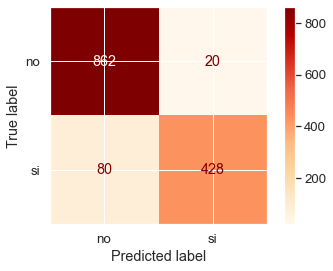

In [23]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='OrRd',
    )

### b) Normalizando por fila:

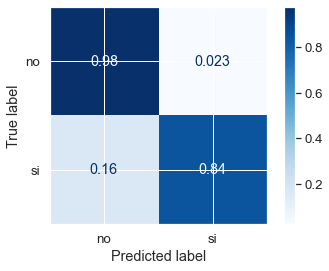

In [24]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

### c) No permite variar el punto de corte, entonces:

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

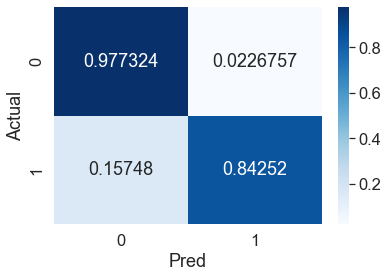

In [25]:
y_pred1=rf.predict(x_train)

sns.set(font_scale=1.5)                 # Ajuste tamaño de letra (var global)
conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g')

### d) Seteo del punto de corte

In [26]:
y_prob_tr

array([1.        , 0.02133333, 0.32816265, ..., 0.07235476, 0.88975   ,
       0.10176233])

### e) ¡Importante! Elección de un punto de corte

La primer opción es un punto que sea mayor al promedio.

In [27]:
y_prob_tr.mean()

0.3668220232617517

Creamos el label 🦾

In [28]:
import numpy as np

# Recuerden actualizar este valor 0.35 con el valor promedio que obtuvieron
np.where(y_prob_tr > 0.35, "si", "no")

array(['si', 'no', 'no', ..., 'no', 'si', 'no'], dtype='<U2')

Lo asignamos...

In [29]:
# Recuerden actualizar este valor 0.35 con el valor promedio que obtuvieron
y_pred2=np.where(y_prob_tr > 0.35, 1, 0)

In [30]:
y_pred2

array([1, 0, 0, ..., 0, 1, 0])

### f) Matriz de confusión (punto de corte custom)

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

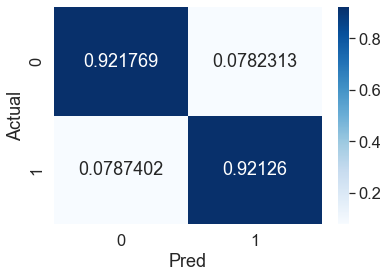

In [31]:
conf_mat2=pd.crosstab(index=y_train, 
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

Comparando antes y después:

In [32]:
import matplotlib.pyplot as plt

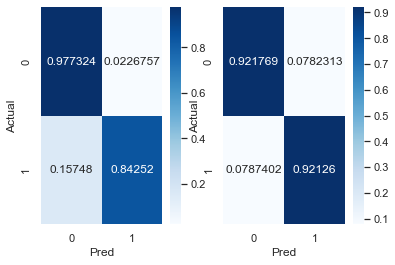

In [33]:
sns.set(font_scale=1)       # Ajuste tamaño de letra (var global)
fig, ax = plt.subplots(1,2)  

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

fig.show(warn=False)

### g) Análisis de los distintos puntos de corte

**Nota:** Nunca elegir el punto de corte con los datos de testing

In [34]:
#!pip3 install yellowbrick

Esta celda resuelve la tarea pero con muchos warnings ☢️
```
from yellowbrick.classifier.threshold import discrimination_threshold

dis_res=discrimination_threshold(rf, x_train, y_train,)
dis_res
```

👆 Así que la vamos a actualizar por esta celda:

**Nota:** Esta celda toma algunos minutos, mientras tanto espera el resultado con un café o mate 😎

C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


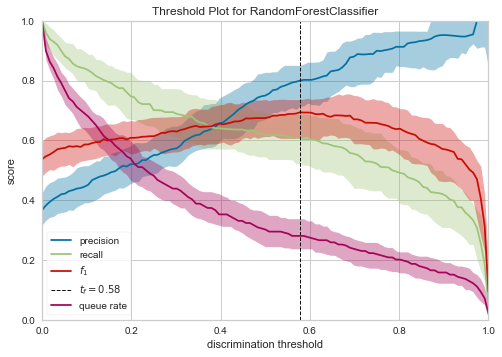

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [35]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

### h) Curva ROC

Graficamos para training y para test

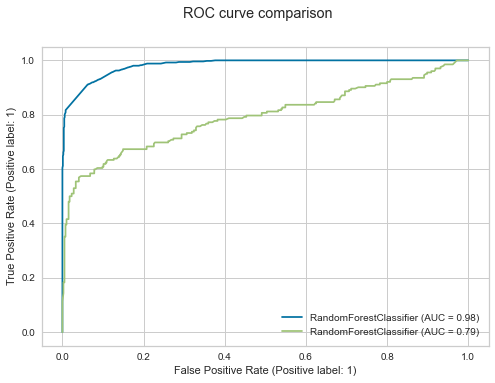

In [36]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

# 4) Guardar un modelo

Vamos a guardar el modelo de clasificación

In [37]:
import pickle

In [38]:
# Guardar en el disco
filename = 'rf.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [39]:
# Lo cargamos para usarlo en otro momento. 
rf_loaded = pickle.load(open(filename, 'rb'))